### Link to results
[Proportion of peaks with hits](#peaks-with-hits)

[Examples of motif hits](#example-hits)

[Homotypic density of motifs in peaks](#density)

[Co-occurrence of motifs in peaks](#co-occurrence)

[Distance between co-occurring motifs](#distance)

In [1]:
import os
os.chdir('/home/katie/bp_repo/reports/')

from util import import_shap_scores, import_peak_table
from util import trim_motif_by_ic
from util import figure_to_vdom_image
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from IPython.display import display
import tqdm
tqdm.tqdm_notebook()

/tmp/ipykernel_44432/2372770853.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm.tqdm_notebook()


0it [00:00, ?it/s]

In [7]:
df = pd.read_csv('/home/katie/bp_repo/reports/CTCF_overlap_original_intervals', sep='\t', header=None)

In [8]:
df = df.iloc[:, [0, 1, 2, 10, 11, 12]]

# checked with drop_duplicates and there are no duplicate rows, even if there are some
# duplicates within A and within B

In [17]:
chip_original = pd.read_csv('/home/katie/bp_repo/research/data/chip-seq/CTCF/CTCF.bed', sep='\t', header=None)
cut_original = pd.read_csv('/home/katie/bp_repo/research/data/cutnrun/CTCF/CTCF.bed', sep='\t', header=None)
chip = chip.iloc[:, :3]
cut = cut.iloc[:, :3]

In [11]:
df_chip = df.iloc[:, :3]
df_chip

,0,1,2
0,chr19,40634168,40634901
1,chr17,80575052,80576111
2,chr17,45135164,45135856
3,chr19,42108154,42109171
4,chr19,33777802,33778768
...,...,...,...
30818,chr9,106648916,106649123
30819,chr9,73915968,73916293
30820,chrX,21942005,21942358
30821,chrX,52271305,52271549


In [13]:
df_cut = df.iloc[:, 3:]

In [15]:
df_cut_drop_dups = df_cut.drop_duplicates()
df_chip_drop_dups = df_chip.drop_duplicates()

In [16]:
print(len(df_cut_drop_dups))
print(len(df_chip_drop_dups))

29980
30822


In [86]:
len(cut)

54233

In [88]:
len(chip)

35828

In [ ]:
len(df)

30823

## bedtools intersect -u files analysis

so actually this is basically the same as the -wa -wb files with  drop_duplicates which is AWESOME and SWAG and COOL and GREAT :)))))

In [51]:
chip_original_ctcf = pd.read_csv('/home/katie/bp_repo/research/data/chip-seq/CTCF/CTCF.bed', sep='\t', header=None)
cut_original_ctcf = pd.read_csv('/home/katie/bp_repo/research/data/cutnrun/CTCF/CTCF.bed', sep='\t', header=None)
chip_original_fosl2 = pd.read_csv('/home/katie/bp_repo/research/data/chip-seq/FOSL2/FOSL2.bed', sep='\t', header=None)
cut_original_fosl2 = pd.read_csv('/home/katie/bp_repo/research/data/cutnrun/FOSL2/FOSL2.bed', sep='\t', header=None)

In [47]:
cutnrun_unique_ctcf = pd.read_csv('/home/katie/bp_repo/reports/CTCF_unique_cutnrun_with_any_chip_overlap', 
                                  sep='\t', header=None)
chip_unique_ctcf = pd.read_csv('/home/katie/bp_repo/reports/CTCF_unique_chip_with_any_cutnrun_overlap', 
                               sep='\t', header=None)
cutnrun_unique_fosl2 = pd.read_csv('/home/katie/bp_repo/reports/FOSL2_unique_cutnrun_with_any_chip_overlap', 
                                  sep='\t', header=None)
chip_unique_fosl2 = pd.read_csv('/home/katie/bp_repo/reports/FOSL2_unique_chip_with_any_cutnrun_overlap', 
                               sep='\t', header=None)

In [68]:
len(chip_original_ctcf)

35828

In [69]:
len(cut_original_ctcf)

54233

In [70]:
len(chip_original_fosl2)

33488

In [71]:
len(cut_original_fosl2)

45597

In [55]:
print(f'Percent CTCF cutnrun peaks with >0 chipseq overlap: {len(cutnrun_unique_ctcf) / len(cut_original_ctcf)}')
print(f'Percent FOSL2 cutnrun peaks with >0 chipseq overlap: {len(cutnrun_unique_fosl2) / len(cut_original_fosl2)}')
print(f'Percent CTCF chipseq peaks with >0 cutnrun overlap: {len(chip_unique_ctcf) / len(chip_original_ctcf)}')
print(f'Percent FOSL2 chipseq peaks with >0 cutnrun overlap: {len(chip_unique_fosl2) / len(chip_original_fosl2)}')
print('\n')
print(f'Number of CTCF cutnrun peaks with >0 chipseq overlap: {len(cutnrun_unique_ctcf)}')
print(f'Number of FOSL2 cutnrun peaks with >0 chipseq overlap: {len(cutnrun_unique_fosl2)}')
print(f'Number of CTCF chipseq peaks with >0 cutnrun overlap: {len(chip_unique_ctcf)}')
print(f'Number of FOSL2 chipseq peaks with >0 cutnrun overlap: {len(chip_unique_fosl2)}')

Percent CTCF cutnrun peaks with >0 chipseq overlap: 0.5527999557465012
Percent FOSL2 cutnrun peaks with >0 chipseq overlap: 0.5575147487773319
Percent CTCF chipseq peaks with >0 cutnrun overlap: 0.8602768784191135
Percent FOSL2 chipseq peaks with >0 cutnrun overlap: 0.7915969899665551


Number of CTCF cutnrun peaks with >0 chipseq overlap: 29980
Number of FOSL2 cutnrun peaks with >0 chipseq overlap: 25421
Number of CTCF chipseq peaks with >0 cutnrun overlap: 30822
Number of FOSL2 chipseq peaks with >0 cutnrun overlap: 26509


### Unique peaks with no overlap YOU GET THE ROYAL CHECK MARK FOR COMPLYING WITH THE ABOVE WOOOO

should just be negation of unique peaks with overlap, above. but good to have the actual peaks too i guess :D EDIT: YEP YEP POG

In [24]:
cutnrun_unique_NO_OVERLAP = pd.read_csv('/home/katie/bp_repo/reports/CTCF_unique_cutnrun_with_no_chip_overlap', 
                                        sep='\t', header=None)
chip_unique_NO_OVERLAP = pd.read_csv('/home/katie/bp_repo/reports/CTCF_unique_chip_with_no_cutnrun_overlap', 
                                     sep='\t', header=None)

In [26]:
len(cutnrun_unique_NO_OVERLAP) / len(cut_original)

0.4472000442534988

In [25]:
len(chip_unique_NO_OVERLAP) / len(chip_original)

0.13972312158088646

## GRAPHING

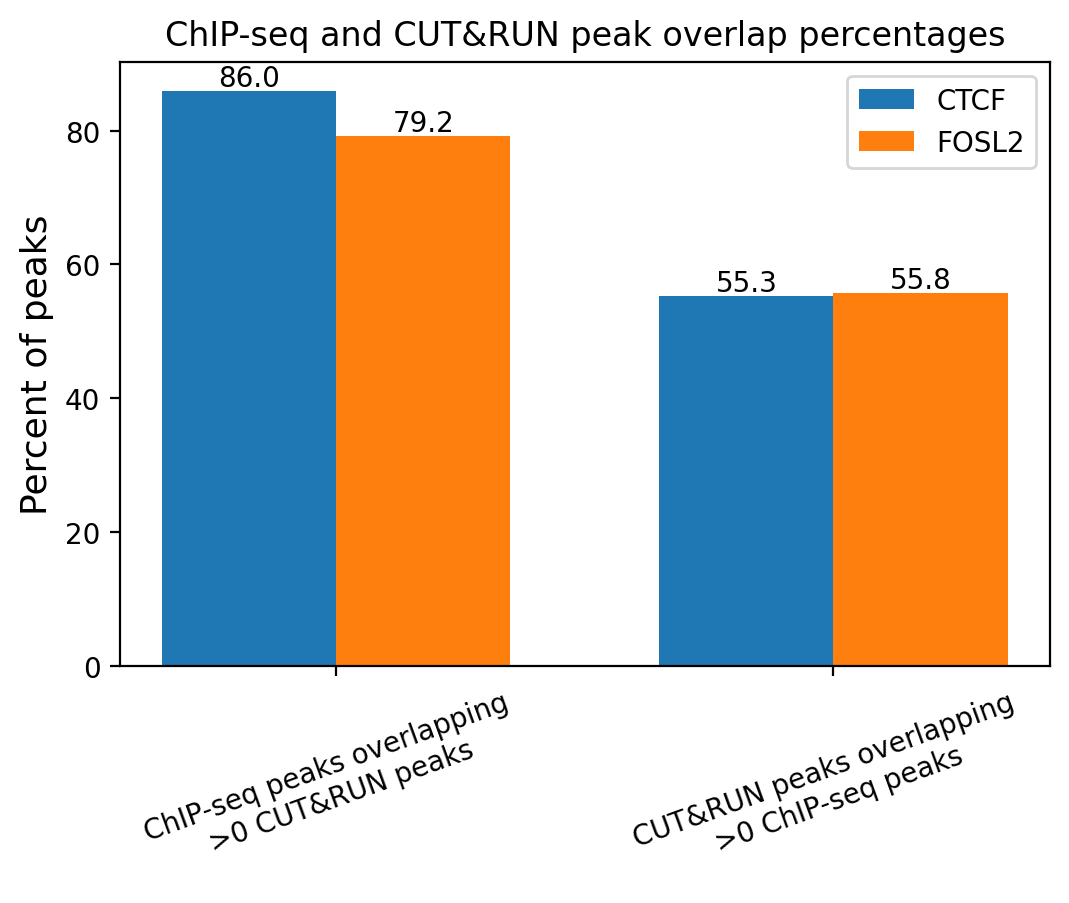

In [58]:
ctcf_stats = (86.0, 55.3)
fosl2_stats = (79.2, 55.8)

ind = np.arange(len(ctcf_stats))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(dpi=200)
rects1 = ax.bar(ind - width/2, ctcf_stats, width, 
                label='CTCF')
rects2 = ax.bar(ind + width/2, fosl2_stats, width,
                label='FOSL2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent of peaks', fontsize=13)
ax.set_title('ChIP-seq and CUT&RUN peak overlap percentages')
ax.set_xticks(ind)
ax.set_xticklabels(('ChIP-seq peaks overlapping \n>0 CUT&RUN peaks', 
                    'CUT&RUN peaks overlapping \n>0 ChIP-seq peaks'), rotation=20, fontsize=10)
ax.legend(loc='upper right')

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, -0.5),  # use -0.5 point offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "center")
autolabel(rects2, "center")

plt.show()

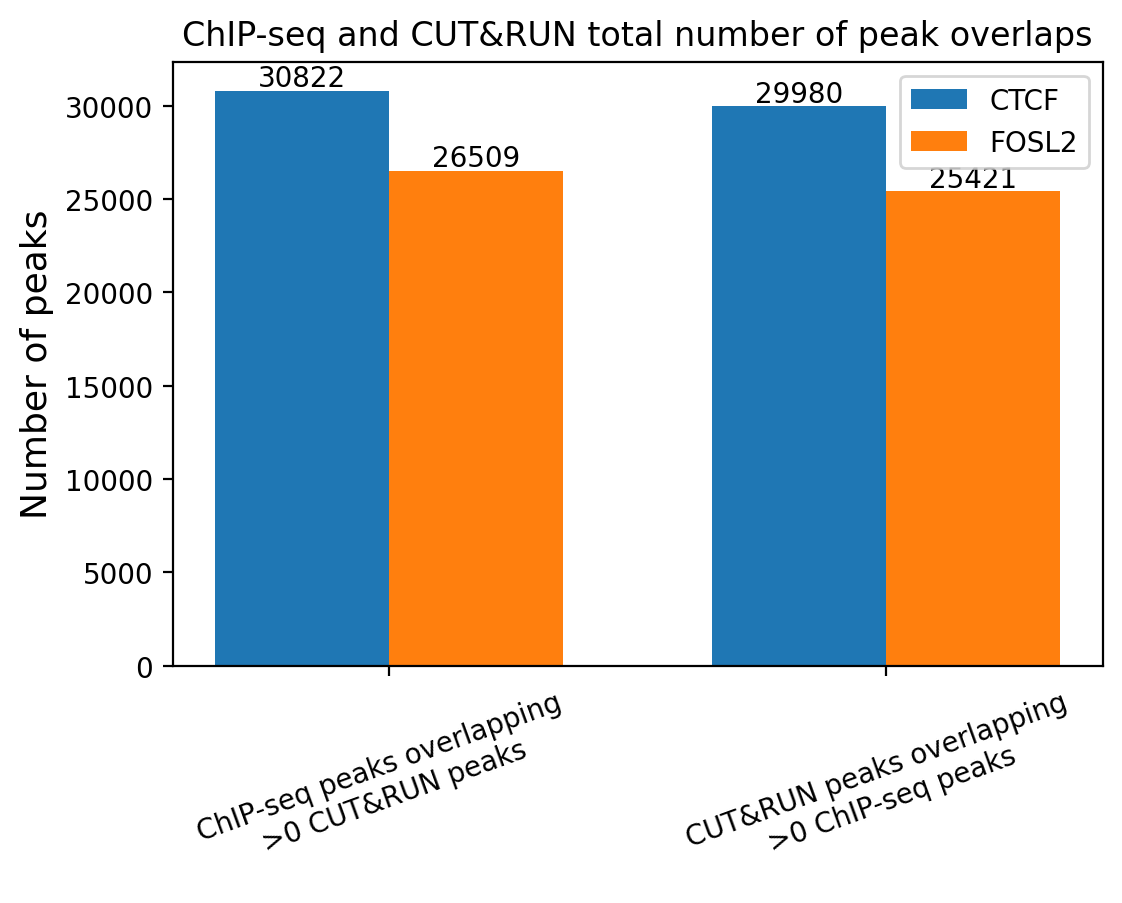

In [64]:
ctcf_stats = (30822, 29980)
fosl2_stats = (26509, 25421)

ind = np.arange(len(ctcf_stats))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(dpi=200)
rects1 = ax.bar(ind - width/2, ctcf_stats, width, 
                label='CTCF')
rects2 = ax.bar(ind + width/2, fosl2_stats, width,
                label='FOSL2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of peaks', fontsize=13)
ax.set_title('ChIP-seq and CUT&RUN total number of peak overlaps')
ax.set_xticks(ind)
ax.set_xticklabels(('ChIP-seq peaks overlapping \n>0 CUT&RUN peaks', 
                    'CUT&RUN peaks overlapping \n>0 ChIP-seq peaks'), rotation=20, fontsize=10)
ax.legend(loc='upper right')

autolabel(rects1, "center")
autolabel(rects2, "center")

plt.show()

## Other practice stuff

In [2]:
def import_profiles(preds_path):
    """
    Imports the set of profile predictions.
    Arguments:
        `preds_path`: path to predictions/performance metrics of the model
    Returns an M x T x O x 2 array of true profile counts, an M x T x O x 2
    array of predicted profile probabilities, and an M x 3 object array of
    corresponding coordinates.
    """
    with h5py.File(preds_path, "r") as f:
        num_seqs, num_tasks, input_length, _ = f["predictions"]["true_profs"].shape
        batch_size = min(1000, num_seqs)
        num_batches = int(np.ceil(num_seqs / batch_size))
        
        true_profs = np.empty((num_seqs, num_tasks, input_length, 2))
        pred_profs = np.empty((num_seqs, num_tasks, input_length, 2))
        coords = np.empty((num_seqs, 3), dtype=object)
        
        for i in tqdm.notebook.trange(num_batches, desc="Importing predictions"):
            batch_slice = slice(i * batch_size, (i + 1) * batch_size)
            true_profs[batch_slice] = f["predictions"]["true_profs"][batch_slice]
            pred_profs[batch_slice] = np.exp(f["predictions"]["log_pred_profs"][batch_slice])
            coords[batch_slice, 0] = f["coords"]["coords_chrom"][batch_slice].astype(str)
            coords[batch_slice, 1] = f["coords"]["coords_start"][batch_slice]
            coords[batch_slice, 2] = f["coords"]["coords_end"][batch_slice]
    
    return true_profs, pred_profs, coords

In [42]:
with h5py.File('/home/katie/bp_repo/pipeline_outputs/ctcf_chipseq_oct3/preds', 'r') as f:
    print(f.keys())
    file = f['predictions']
    print(file.keys())
    print(file['true_profs'].shape)
    print(file['true_counts'].shape)
    k = file['true_profs']
    print((file['true_profs'][:][:][0]))

<KeysViewHDF5 ['coords', 'predictions']>
<KeysViewHDF5 ['log_pred_counts', 'log_pred_profs', 'true_counts', 'true_profs']>
(71606, 1, 1000, 2)
(71606, 1, 2)
[[[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [2. 0.]
  [0. 0.]
  [0. 0.]]]


In [3]:
# Define parameters/fetch arguments
peak_bed_paths = ["/home/katie/bp_repo/research/data/cutnrun/FOSL2/FOSL2.bed", 
                  "/home/katie/bp_repo/research/data/chip-seq/FOSL2/FOSL2.bed"]

print("Cut&run peaks path: %s" % peak_bed_paths[0])
print("Chip-seq peaks path: %s" % peak_bed_paths[1])

Cut&run peaks path: /home/katie/bp_repo/research/data/cutnrun/FOSL2/FOSL2.bed
Chip-seq peaks path: /home/katie/bp_repo/research/data/chip-seq/FOSL2/FOSL2.bed


In [73]:
np.unique(peak_table.peak_end - peak_table.peak_start)

array([2114])

In [28]:
# how many peaks have core motif hit from either task
unique_peaks_max = set(hit_table_filtered_max_0_0.peak_index.unique())  # unique peaks with at least 1 core motif hit
unique_peaks_min = set(hit_table_filtered_min_0_0.peak_index.unique())

print(f'Number of unique peaks from max task with >0 core motif hit: {len(unique_peaks_max)}')
print(f'Number of unique peaks from min task with >0 core motif hit: {len(unique_peaks_min)}')
print(f'Number of unique peaks from either task with >0 core motif hit: {len(unique_peaks_max | unique_peaks_min)}')
print(f'Percent of peaks with >0 core motif hit from either task: {round(len(unique_peaks_max | unique_peaks_min) / len(peak_hits_max) * 100, 1)}%')


Number of unique peaks from max task with >0 core motif hit: 34916
Number of unique peaks from min task with >0 core motif hit: 41129
Number of unique peaks from either task with >0 core motif hit: 41977
Percent of peaks with >0 core motif hit from either task: 92.1%


In [29]:
# how many peaks have any general motif hit from either task
ORIG_unique_peaks_max = set(hit_table_filtered_max.peak_index.unique())  # unique peaks with at least 1 general motif hit
ORIG_unique_peaks_min = set(hit_table_filtered_min.peak_index.unique())

print(f'Number of unique peaks from max task with >0 core motif hit: {len(ORIG_unique_peaks_max)}')
print(f'Number of unique peaks from min task with >0 core motif hit: {len(ORIG_unique_peaks_min)}')
print(f'Number of unique peaks from either task with >0 core motif hit: {len(ORIG_unique_peaks_max | ORIG_unique_peaks_min)}')
print(f'Percent of peaks with >0 general motif hit from either task: {round(len(ORIG_unique_peaks_max | ORIG_unique_peaks_min) / len(peak_hits_max) * 100, 1)}%')


Number of unique peaks from max task with >0 core motif hit: 34916
Number of unique peaks from min task with >0 core motif hit: 41157
Number of unique peaks from either task with >0 core motif hit: 41978
Percent of peaks with >0 general motif hit from either task: 92.1%


#### b) Calculate how many peaks have core motif hit from JUST max task, from JUST min task, and from BOTH tasks

In [30]:
print(f'Number of unique peaks with >0 core motif hit from JUST MAX task: {len(unique_peaks_max.difference(unique_peaks_min))}')
print(f'Percent of unique peaks with >0 core motif hit from JUST MAX task: {round(len(unique_peaks_max.difference(unique_peaks_min)) / len(peak_hits_max) * 100, 1)}%')


Number of unique peaks with >0 core motif hit from JUST MAX task: 848
Percent of unique peaks with >0 core motif hit from JUST MAX task: 1.9%


In [31]:
print(f'Number of unique peaks with >0 core motif hit from JUST MIN task: {len(unique_peaks_min.difference(unique_peaks_max))}')
print(f'Percent of unique peaks with >0 core motif hit from JUST MIN task: {round(len(unique_peaks_min.difference(unique_peaks_max)) / len(peak_hits_max) * 100, 1)}%')


Number of unique peaks with >0 core motif hit from JUST MIN task: 7061
Percent of unique peaks with >0 core motif hit from JUST MIN task: 15.5%


In [32]:
print(f'Number of unique peaks with >0 core motif hit from BOTH TASKS: {len(unique_peaks_max & unique_peaks_min)}')
print(f'Percent of unique peaks with >0 core motif hit from BOTH TASKS: {round(len(unique_peaks_max & unique_peaks_min) / len(peak_hits_max) * 100, 1)}%')


Number of unique peaks with >0 core motif hit from BOTH TASKS: 34068
Percent of unique peaks with >0 core motif hit from BOTH TASKS: 74.7%


In [31]:
## these percentages add up to 92.1%, as expected

#### c) Calculate how many peaks have NO core motif hit from either task

In [33]:
print(f'Number of unique peaks with no core motif hit: {len(peak_hits_max) - len(unique_peaks_max | unique_peaks_min)}')
print(f'Percent of unique peaks with no core motif hit: {round((len(peak_hits_max) - len(unique_peaks_max | unique_peaks_min)) / len(peak_hits_max) * 100, 1)}%')
# yep sounds right


Number of unique peaks with no core motif hit: 3620
Percent of unique peaks with no core motif hit: 7.9%


In [35]:
# example for future reference
setty1 = {1, 2, 3}
setty2 = {2, 4, 6}
print(f'setty1: {setty1}\nsetty2: {setty2}')
print(f'setty1 symmetric difference with setty2: {setty1.symmetric_difference(setty2)}')
print(f'setty1 difference with setty2: {setty1.difference(setty2)}')
print(f'setty2 difference with setty1: {setty2.difference(setty1)}')
print(f'setty1 intersection with setty2: {setty1.intersection(setty2)}')

setty1: {1, 2, 3}
setty2: {2, 4, 6}
setty1 symmetric difference with setty2: {1, 3, 4, 6}
setty1 difference with setty2: {1, 3}
setty2 difference with setty1: {4, 6}
setty1 intersection with setty2: {2}


#### d) Bar plot, with comparison to CTCF

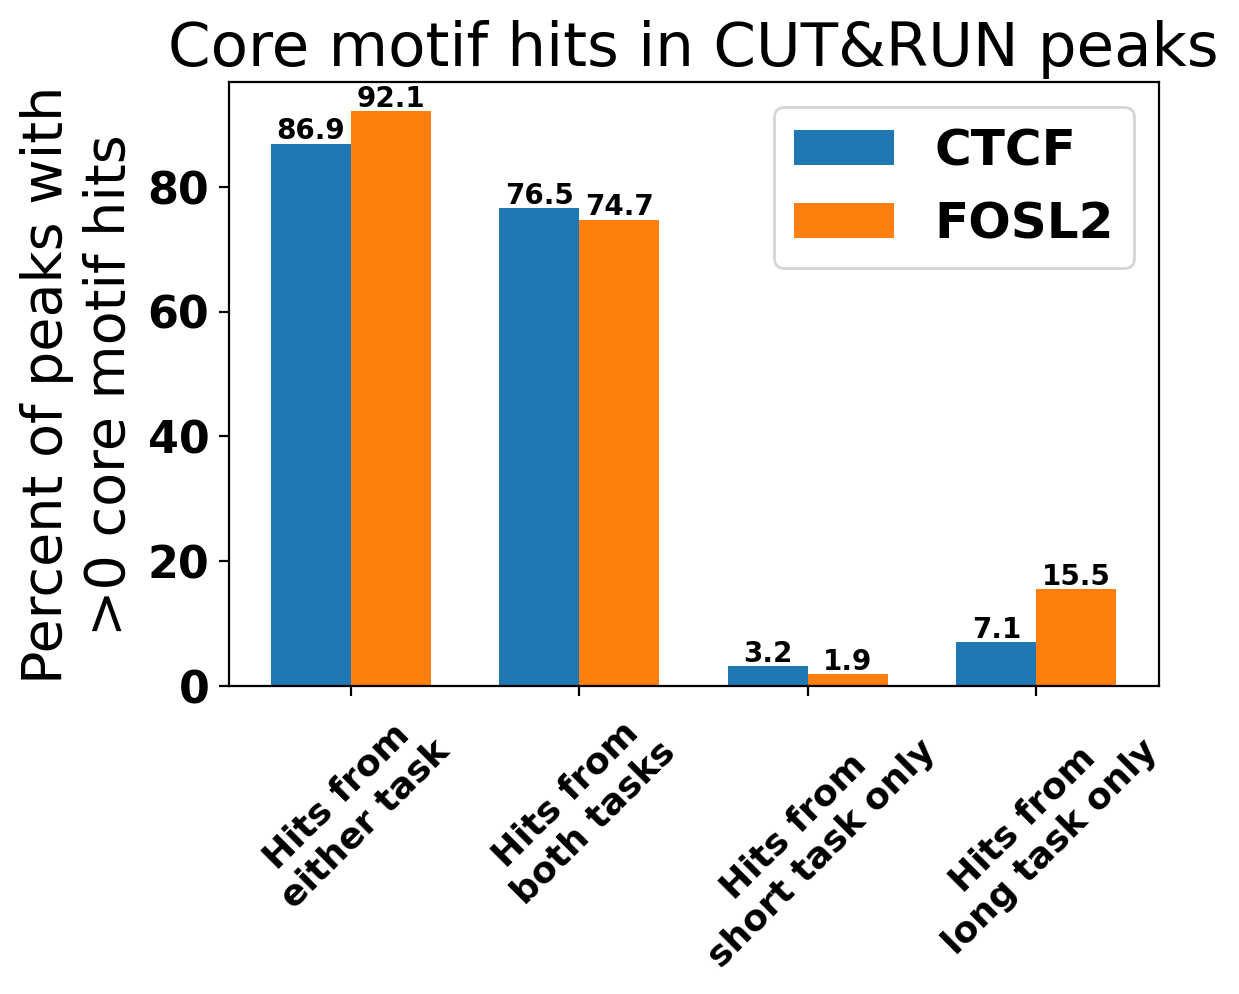

In [112]:
# order: ( % of peaks that have >0 core motif hit from EITHER TASK, 
#          % of peaks that have >0 core motif hit from BOTH TASKS)
#          % of peaks that have >0 core motif hit from ONLY SHORT TASK, 
#          % of peaks that have >0 core motif hit from ONLY LONG TASK )
ctcf_stats = (86.9, 76.5, 3.2, 7.1)
fosl2_stats = (92.1, 74.7, 1.9, 15.5)

ind = np.arange(len(ctcf_stats))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(dpi=200)
rects1 = ax.bar(ind - width/2, ctcf_stats, width, 
                label='CTCF')
rects2 = ax.bar(ind + width/2, fosl2_stats, width,
                label='FOSL2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent of peaks with\n>0 core motif hits')
ax.set_title('Core motif hits in CUT&RUN peaks')
ax.set_xticks(ind)
ax.set_xticklabels(('Hits from\neither task', 'Hits from\nboth tasks', 'Hits from\nshort task only', 
                    'Hits from\nlong task only'), rotation=45, fontsize=13)
ax.legend()

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, -0.5),  # use -0.5 point offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "center")
autolabel(rects2, "center")
plt.show()

In [10]:
# Import peaks
cutnrun_peak_table = import_peak_table([peak_bed_paths[0]])
chipseq_peak_table = import_peak_table([peak_bed_paths[1]])

In [ ]:
cutnrun_peak_table

,chrom,peak_start,peak_end,name,score,strand,signal,pval,qval,summit_offset,...,i1,i2,i3,i4,i5,i6,i7,i8,i9,summit
0,chr3,93470365,93470785,.,1000,.,27.74848,3258.70117,3249.21973,240,...,5.00,93470366,93470785,1896.62085,239,93470366,93470785,1367.65308,239,93470605
1,chr19,38683390,38684747,.,1000,.,9.74137,912.50061,905.49048,678,...,5.00,38683387,38684740,449.35483,679,38683418,38684730,468.06458,636,38684068
2,chr10,3095062,3096140,.,1000,.,16.90691,841.41528,834.54559,657,...,5.00,3095151,3096141,440.94794,568,3094990,3096116,402.67105,729,3095719
3,chr2,28583755,28585173,.,1000,.,23.60403,792.79114,786.05792,549,...,5.00,28583760,28585166,403.49573,548,28583755,28585183,391.65137,548,28584304
4,chrM,22,4162,.,1000,.,4.19948,812.82208,806.00909,3888,...,5.00,22,4171,444.56094,3888,1280,4119,371.92319,2634,3910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45592,chrX,16838069,16838577,.,546,.,3.46276,4.34507,2.18770,230,...,1.32,16838070,16838577,2.82668,127,16838069,16838486,4.77976,234,16838299
45593,chr1,218347734,218348587,.,546,.,3.12710,6.56924,4.21969,494,...,1.32,218347550,218348587,2.82282,696,218347964,218349145,5.03415,236,218348228
45594,chr6,25005798,25006648,.,545,.,3.12796,3.41861,1.38861,697,...,1.31,25005798,25006648,2.81789,651,25005632,25006576,5.34707,388,25006495
45595,chr8,25639470,25640183,.,541,.,3.72821,4.43080,2.24517,249,...,1.31,25639307,25641096,2.81789,1571,25639470,25640286,5.41348,249,25639719


In [ ]:
chipseq_peak_table

,chrom,peak_start,peak_end,name,score,strand,signal,pval,qval,summit_offset,summit
0,chr12,122399208,122401025,Peak_1,26800,.,107.65137,2680.01440,2673.33105,1458,122400666
1,chr19,32372610,32374391,Peak_2,26401,.,103.19633,2640.17969,2633.51050,1353,32373963
2,chr8,125218801,125220026,Peak_3,25389,.,111.29877,2538.90430,2532.26416,648,125219449
3,chr8,131856359,131857707,Peak_4,23428,.,180.90532,2342.84546,2336.25903,600,131856959
4,chr11,64854467,64855919,Peak_5,22896,.,155.04886,2289.67676,2283.10791,668,64855135
...,...,...,...,...,...,...,...,...,...,...,...
33483,chr4,143025148,143025600,Peak_33484,158,.,6.68265,15.82610,13.19417,129,143025277
33484,chr4,154086270,154086611,Peak_33485,158,.,6.68265,15.82610,13.19417,228,154086498
33485,chr4,183936681,183936899,Peak_33486,158,.,6.68265,15.82610,13.19417,130,183936811
33486,chr4,5086579,5086844,Peak_33487,158,.,6.68265,15.82610,13.19417,121,5086700


In [14]:
input_length = 2114

In [15]:
# Expand to input length
cutnrun_peak_table["peak_start"] = \
    (cutnrun_peak_table["peak_start"] + cutnrun_peak_table["summit_offset"]) - (input_length // 2)
cutnrun_peak_table["peak_end"] = cutnrun_peak_table["peak_start"] + input_length

chipseq_peak_table["peak_start"] = \
    (chipseq_peak_table["peak_start"] + chipseq_peak_table["summit_offset"]) - (input_length // 2)
chipseq_peak_table["peak_end"] = chipseq_peak_table["peak_start"] + input_length

In [75]:
def get_motif_hits_in_dnase_peaks(hit_table, dnase_peaks):
    '''
    USE THIS! From a table of motif hits, finds how many overlap a dnase peak.
    
    Input:
    hit_table: pd dataframe of motif hits
    dnase_peaks: pd dataframe of peaks
    
    Output:
    (integer of how many motif hits overlap a dnase peak, float of percent of motif hits overlapping a dnase peak)
    '''
    num_hits_overlapping_dnase = 0
    
    #for index, hit in tqdm.tqdm_notebook(hit_table.iterrows()):
    for index, hit in hit_table.iterrows():
        conditions = (hit.chrom == dnase_peaks.chrom) & (hit.start >= dnase_peaks.peak_start) & (hit.end <= dnase_peaks.peak_end)
        if len(dnase_peaks[conditions]) > 0:
            num_hits_overlapping_dnase += 1 
            
    percent_hits_overlapping_dnase = num_hits_overlapping_dnase / len(hit_table)
    return num_hits_overlapping_dnase, percent_hits_overlapping_dnase


In [72]:
hit_table_filtered_max_0_0_SPLIT = np.array_split(hit_table_filtered_max_0_0, 64)

In [48]:
def get_motif_hits_in_dnase_peaks(hit, dnase_peaks):
    '''
    USE THIS! From a table of motif hits, finds how many overlap a dnase peak.
    
    Input:
    hit_table: pd dataframe of motif hits
    dnase_peaks: pd dataframe of peaks
    
    Output:
    (integer of how many motif hits overlap a dnase peak, float of percent of motif hits overlapping a dnase peak)
    '''
    num_hits_overlapping_dnase = 0
    
    conditions = (hit.chrom == dnase_peaks.chrom) & (hit.start >= dnase_peaks.peak_start) & (hit.end <= dnase_peaks.peak_end)
    num_hits_overlapping_dnase = len(dnase_peaks[conditions]) > 0

    return int(num_hits_overlapping_dnase)


In [ ]:
import joblib
from datetime import datetime

In [76]:
print(datetime.now())
out = joblib.Parallel(n_jobs=64)(joblib.delayed(get_motif_hits_in_dnase_peaks)(hit_table, dnase_peaks) for 
                                 hit_table in hit_table_filtered_max_0_0_SPLIT)
print(datetime.now())

2022-01-06 17:42:00.385535
2022-01-06 17:42:11.635788


In [80]:
sum(num_hits[0] for num_hits in out)

13778

In [51]:
with open('/home/katie/bp_repo/reports/dnase_motif_hits/ctcf_maxfl120_0_0', 'rb') as f:
    ctcf_maxfl120_0_0 = pickle.load(f)
with open('/home/katie/bp_repo/reports/dnase_motif_hits/ctcf_minfl150_0_0', 'rb') as f:
    ctcf_minfl150_0_0 = pickle.load(f)
with open('/home/katie/bp_repo/reports/dnase_motif_hits/fosl2_maxfl120_0_0', 'rb') as f:
    fosl2_maxfl120_0_0 = pickle.load(f)
with open('/home/katie/bp_repo/reports/dnase_motif_hits/fosl2_minfl150_0_0', 'rb') as f:
    fosl2_minfl150_0_0 = pickle.load(f)

In [52]:
ctcf_maxfl120_0_0

{'Number of motif hits from maxfl120 task with motif key 0_0 overlapping a DNase peak': 46428,
 'Percent of motif hits from maxfl120 task with motif key 0_0 overlapping a DNase peak': 0.5342692750287688}

In [55]:
ctcf_minfl150_0_0

{'Number of motif hits from minfl150 task with motif key 0_0 overlapping a DNase peak': 55277,
 'Percent of motif hits from minfl150 task with motif key 0_0 overlapping a DNase peak': 0.5265328672261224}

In [53]:
fosl2_maxfl120_0_0

{'Number of motif hits from maxfl120 task with motif key 0_0 overlapping a DNase peak': 13778,
 'Percent of motif hits from maxfl120 task with motif key 0_0 overlapping a DNase peak': 0.18455809467677553}

In [54]:
fosl2_minfl150_0_0

{'Number of motif hits from minfl150 task with motif key 0_0 overlapping a DNase peak': 21348,
 'Percent of motif hits from minfl150 task with motif key 0_0 overlapping a DNase peak': 0.21743514529287744}

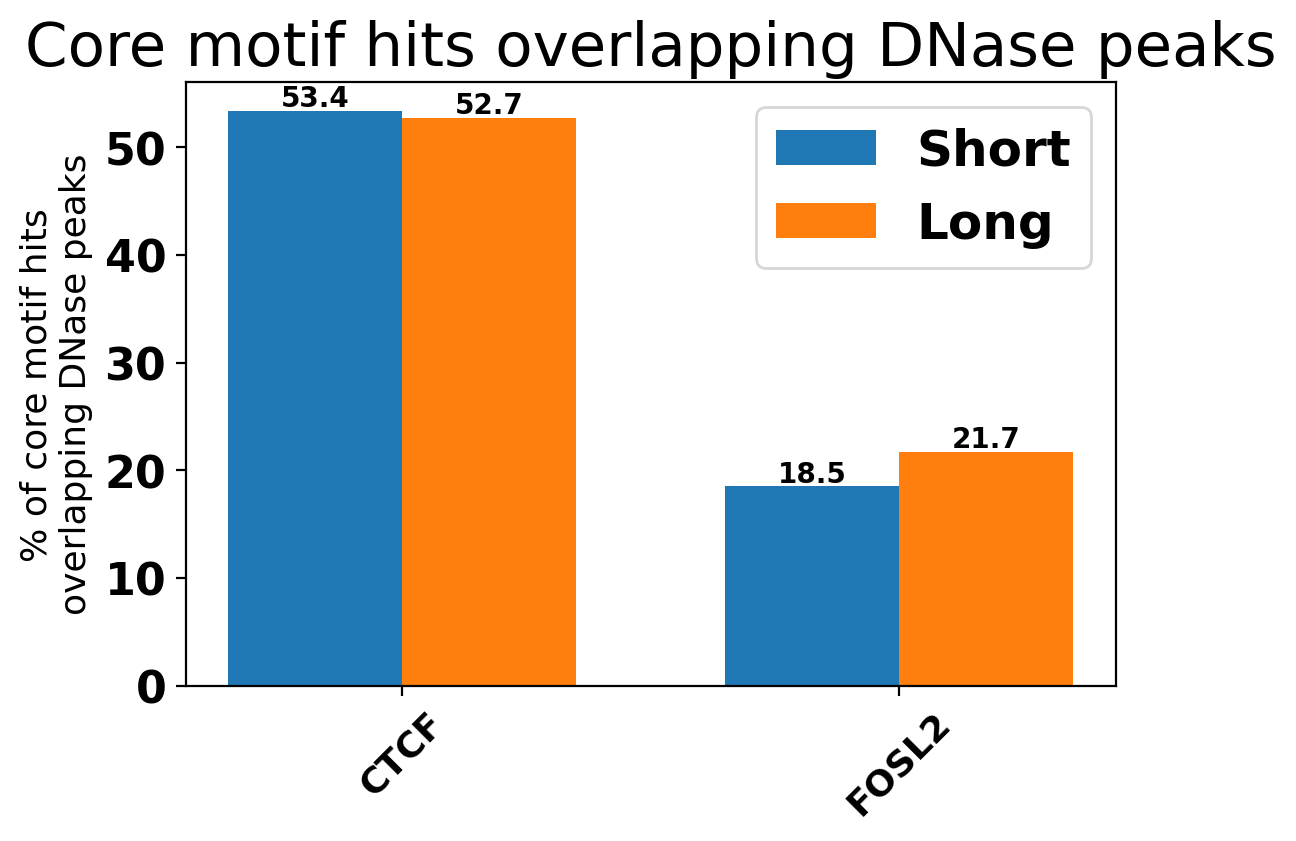

In [113]:
# order: ( % of SHORT motif hits from ctcf, fosl2 with key 0_0 overlapping a dnase peak, 
#          % of LONG motif hits from ctcf, fosl2 with key 0_0 overlapping a dnase peak)
ctcf_stats = (53.4, 18.5)
fosl2_stats = (52.7, 21.7)

ind = np.arange(len(ctcf_stats))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(dpi=200)
rects1 = ax.bar(ind - width/2, ctcf_stats, width, 
                label='Short')
rects2 = ax.bar(ind + width/2, fosl2_stats, width,
                label='Long')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of core motif hits\noverlapping DNase peaks', fontsize=13)
ax.set_title('Core motif hits overlapping DNase peaks')
ax.set_xticks(ind)
ax.set_xticklabels(('CTCF', 'FOSL2'), rotation=45, fontsize=13)
ax.legend(loc='upper right')

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, -0.5),  # use -0.5 point offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "center")
autolabel(rects2, "center")

plt.show()